In [46]:
import cv2
from matplotlib import pyplot as plt
from skimage import feature as ft
%matplotlib inline

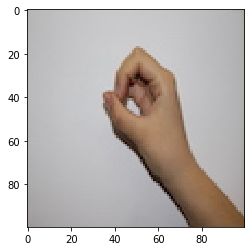

In [47]:
img = cv2.imread(r"C:\Users\Bye_l\Desktop\Dataset\0\IMG_1118.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

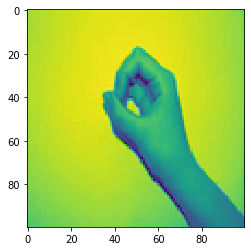

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [ ]:
mask = [x for x in range(100) if x % 10 == 9]

In [56]:
img_copy[mask, :] = 0
img_copy[:, mask] = 0

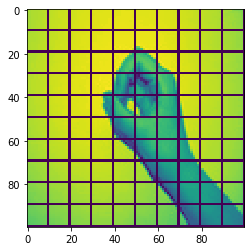

In [57]:
plt.imshow(img_copy)

[[204 205 205 203 204 205 206 161 131 138]
 [204 203 205 204 205 204 165 135 135 144]
 [206 201 205 206 204 164 136 138 143 150]
 [203 204 203 207 173 133 137 143 150 155]
 [201 204 208 188 138 137 142 151 155 151]
 [204 203 202 153 134 141 147 154 151 144]
 [202 207 176 126 138 143 148 153 146 133]
 [206 195 136 132 141 149 148 150 133 120]
 [206 156 123 137 138 149 150 137 123 106]
 [196 125 128 133 137 132 130 126 106  88]]


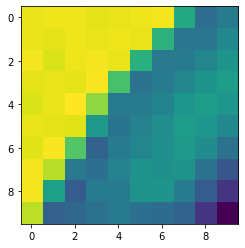

In [59]:
plt.imshow(gray[20: 30, 40: 50])
print(gray[20: 30, 40: 50])

[0.17311786 0.0183563  0.         ... 0.19461701 0.02575486 0.        ]
(19200,)


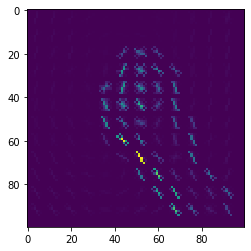

In [110]:
normalised_blocks, hog_image = ft.hog(gray, orientations=12, pixels_per_cell=(8, 8), cells_per_block=(5, 5), block_norm='L2-Hys',visualize=True)
plt.imshow(hog_image)
print(normalised_blocks)
print(normalised_blocks.shape)

In [117]:
import glob
file_path = glob.glob(r"C:\Users\Bye_l\Desktop\Dataset\*\*.JPG")
file_path[0], file_path[-1]

('C:\\Users\\Bye_l\\Desktop\\Dataset\\0\\IMG_1118.JPG',
 'C:\\Users\\Bye_l\\Desktop\\Dataset\\9\\IMG_5990.JPG')

In [118]:
import random
import tqdm
import numpy as np

In [129]:
x_train, y_train, x_test, y_test = [], [], [], []
for i in range(10):
    target = "C:\\Users\\Bye_l\\Desktop\\Dataset\\" + str(i) + "\\*.JPG"
    imgs = glob.glob(target)
    test = random.sample(imgs, int(0.1*len(imgs)))
    for img_name in tqdm.tqdm(imgs):
        x, y = (x_train, y_train) if img_name not in test else (x_test, y_test)
        x.append(img_name)
        y.append(str(i))
x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)


100%|█████████████████████████████████████████████████████████████████████████████| 205/205 [00:00<00:00, 68523.46it/s]

100%|████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 206606.08it/s]

100%|████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 206507.32it/s]

100%|████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 206655.49it/s]

100%|████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 207559.39it/s]

100%|████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 207460.20it/s]

100%|████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 207708.36it/s]

100%|████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 103290.69it/s]

100%|██████████████████████████

In [130]:
from skimage import feature as ft

In [142]:
def hog(img):
    img = cv2.resize(img, (100, 100))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalised_blocks = ft.hog(img, orientations=12, pixels_per_cell=(15, 15), cells_per_block=(2, 2), block_norm='L2-Hys')
    return normalised_blocks

In [143]:
hog_train = []
for path in tqdm.tqdm(x_train):
    img = cv2.imread(path)
    hog_train.append(hog(img))


 71%|██████████████████████████████████████████████████████▊                      | 1325/1862 [00:07<00:02, 198.45it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 1862/1862 [00:09<00:00, 188.01it/s]


In [144]:
hog_test = []
for path in tqdm.tqdm(x_test):
    img = cv2.imread(path)
    hog_test.append(hog(img))


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 196.27it/s]


In [145]:
hog_train, hog_test = np.array(hog_train), np.array(hog_test)

In [146]:
np.save("./hog_train.npy", hog_train)
np.save("./hog_test.npy", hog_test)

In [147]:
local_hog_train = np.load("./hog_train.npy")
(local_hog_train == hog_train).all()

True

In [148]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [149]:
scores = []
for i in tqdm.trange(15):
    knn = KNN(n_neighbors=i+1)
    knn.fit(hog_train, y_train)
    score = knn.score(hog_test, y_test)
    scores.append(score)


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:20<00:00,  1.34s/it]


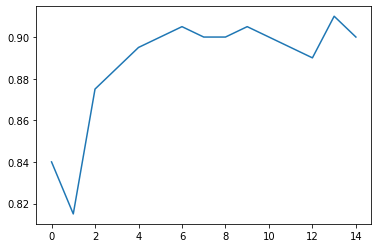

In [154]:
plt.plot(scores)